C:\Users\sammy\AppData\Local\Temp\ipykernel_11880\2430148807.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Longitude'] = clean_df['Longitude'] / 1.7 # Accounts for the curvature of the Earth
C:\Users\sammy\AppData\Local\Temp\ipykernel_11880\2430148807.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Color'] = clean_df['PrimSource'].map(source_colors)


,Plant_Name,City,State,PrimSource,Longitude,Latitude,Color
1,Bankhead Dam,Northport,Alabama,hydroelectric,-51.386366,33.458665,blue
3,Walter Bouldin Dam,Wetumpka,Alabama,hydroelectric,-50.754739,32.583889,blue
6,H Neely Henry Dam,Ohatchee,Alabama,hydroelectric,-50.619059,33.784500,blue
7,Holt Dam,Tuscaloosa,Alabama,hydroelectric,-51.440882,33.255300,blue
8,Jordan Dam,Wetumpka,Alabama,hydroelectric,-50.738118,32.618900,blue
...,...,...,...,...,...,...,...
12269,"BESSP1, LLC.",Shallowater,Texas,solar,-59.982775,33.695594,#f0af24
12270,Buckeye Power Inc.,Marion,Ohio,solar,-49.147059,41.050000,#f0af24
12271,NEE - Pape,Renville,Minnesota,solar,-56.000882,44.788800,#f0af24
12272,Spano Solar - Belmar Wall,Belmar,New Jersey,solar,-43.558824,40.150000,#f0af24


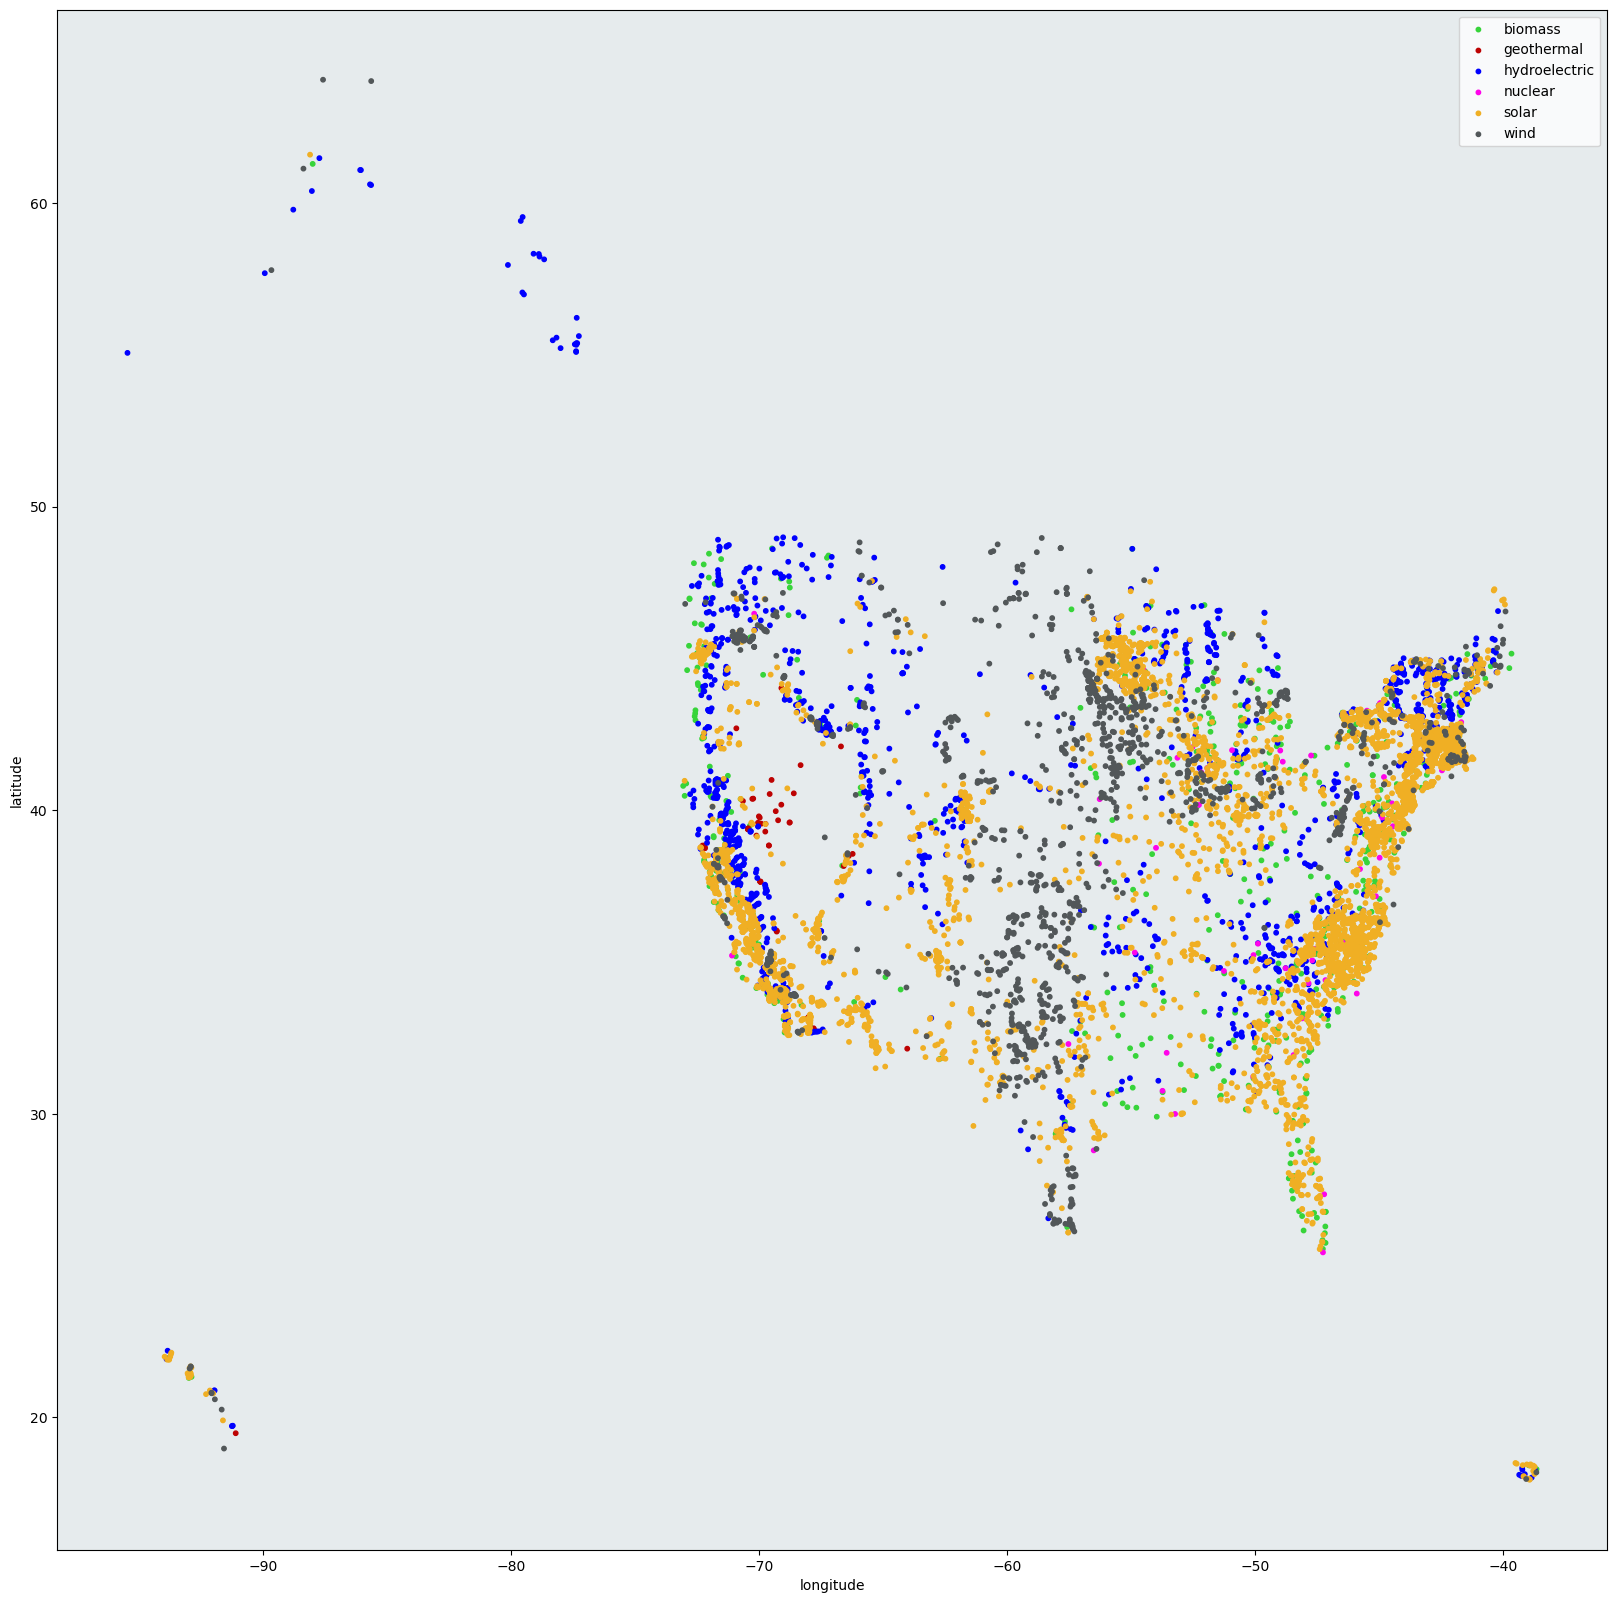

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt

cols = ['Longitude', 'Latitude', 'PrimSource', 'Plant_Name', 'City', 'State']
df = pd.read_csv('Power_Plants.csv', usecols=cols)
clean_sources = ['hydroelectric', 'solar', 'nuclear', 'geothermal', 'wind', 'biomass'] # Row values to construct our clean dataframe 
clean_df = df[df['PrimSource'].isin(clean_sources)]
clean_df['Longitude'] = clean_df['Longitude'] / 1.7 # Accounts for the curvature of the Earth 

source_colors = {'hydroelectric': 'blue', 'solar': '#f0af24', 'nuclear': '#ff03ea', 'geothermal': '#bd0202', 'wind': '#525759', 'biomass': '#37d43a'}

clean_df['Color'] = clean_df['PrimSource'].map(source_colors)
plt.subplot(facecolor = '#e6ebed') # Sets background color 
for primsource, group in clean_df.groupby('PrimSource'):
    plt.scatter(group['Longitude'], group['Latitude'], color=group['Color'], label=primsource, s=10)

plt.rcParams['figure.figsize'] = (20, 20) # Sets the default ratio of the plot 

# plt.scatter(clean_df['Longitude'], clean_df['Latitude'], s=.5)
plt.gca().legend(('biomass','geothermal','hydroelectric','nuclear','solar','wind'))
plt.xlabel('longitude')
plt.ylabel('latitude')
clean_df